In [1]:
import networkx as nx
import matplotlib.pyplot as plt

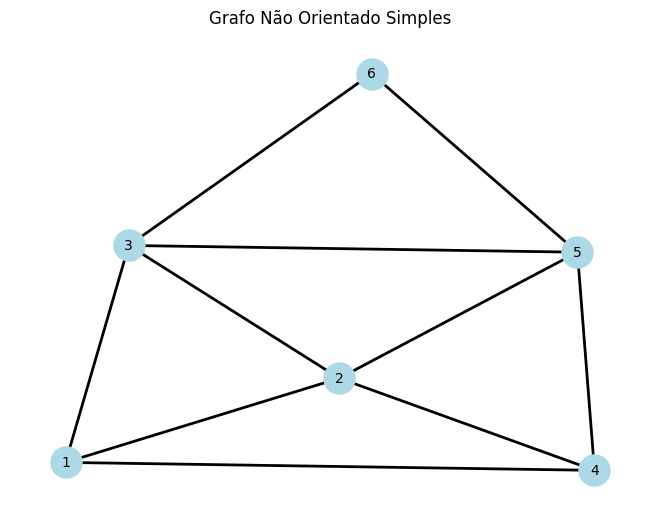

In [2]:
# Criar um grafo não orientado
G = nx.Graph()

# Adicionar nós
G.add_nodes_from([1, 2, 3, 4, 5, 6])

# Adicionar arestas
G.add_edges_from([(1, 2), (1, 3), (1,4), (4,1), (2,4), (2,3), (2,5), (4,5), (3,5), (3,6), (6,5)])

# Visualizar o grafo
pos = nx.spring_layout(G)  # Layout do grafo
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2)
plt.title("Grafo Não Orientado Simples")
plt.show()

In [5]:
# Calculando a matriz de distâncias entre todos os pares de vértices
distancias = dict(nx.all_pairs_shortest_path_length(G))

# Calculando a excentricidade de todos os vértices
excentricidades = nx.eccentricity(G)

# Imprimindo a matriz de distâncias e excentricidade
print("Matriz de Distâncias e Excentricidade:")
for origem, distancias_destino in distancias.items():
    linha = ""
    for destino in range(1, 7):  # Nós de 1 a 6
        if destino in distancias_destino:
            distancia = distancias_destino[destino]
            linha += f"{distancia} "
        else:
            linha += "Inf "  # Se não há caminho, coloca Infinito
    linha += f"  Excentricidade: {excentricidades[origem]}"
    print(linha)

Matriz de Distâncias e Excentricidade:
0 1 1 1 2 2   Excentricidade: 2
1 0 1 1 1 2   Excentricidade: 2
1 1 0 2 1 1   Excentricidade: 2
1 1 2 0 1 2   Excentricidade: 2
2 1 1 1 0 1   Excentricidade: 2
2 2 1 2 1 0   Excentricidade: 2


In [7]:
#Diametro
diametro = nx.diameter(G)
print("Diâmetro do grafo:", diametro)
# Raio do grafo
raio = nx.radius(G)
print("Raio do grafo:", raio)
# Centro do grafo
centro = nx.center(G)
print("Centro do grafo:", centro)
excentricidades = nx.eccentricity(G)
perifericos = [v for v, excentricidade in excentricidades.items() if excentricidade == diametro]
print("Vértices periféricos:", perifericos)

Diâmetro do grafo: 2
Raio do grafo: 2
Centro do grafo: [1, 2, 3, 4, 5, 6]
Vértices periféricos: [1, 2, 3, 4, 5, 6]


Grafo 2

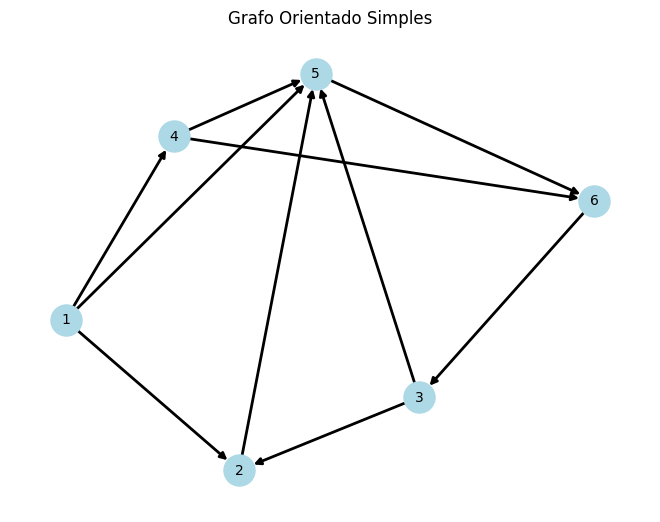

In [8]:
# Grafo orientado simples
G2 = nx.DiGraph()

# Adicionando nós
G2.add_nodes_from([1, 2, 3, 4, 5, 6])

# Adicionando arestas
G2.add_edges_from([(1, 2), (1,5),(1,4),(2,5),(4,5),(4,6),(3,2),(3,5),(5,6),(6,3)])

# Desenhando o grafo
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2, arrows=True)
plt.title("Grafo Orientado Simples")
plt.show()

In [14]:
# Calculando a matriz de distâncias entre todos os pares de vértices
distancias = dict(nx.all_pairs_shortest_path_length(G2))

# Verificando se há caminho mínimo entre todos os pares de vértices
tem_caminho_minimo = True
for origem, distancias_destino in distancias.items():
    for destino, distancia in distancias_destino.items():
        if distancia == float('inf'):
            tem_caminho_minimo = False
            break

# Exibindo o resultado
if tem_caminho_minimo:
    print("Existe caminho mínimo entre todos os pares de vértices.")
else:
    print("Não existe caminho mínimo entre todos os pares de vértices.")

Existe caminho mínimo entre todos os pares de vértices.


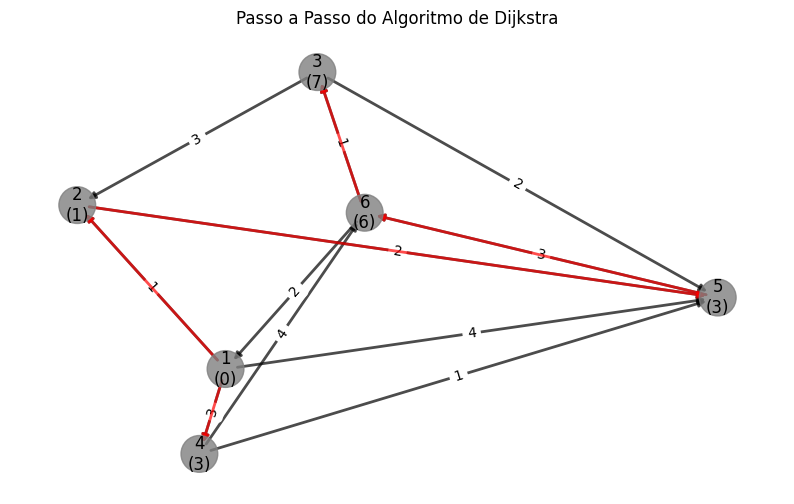

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_step_by_step(G, source):
    # Inicialização
    visited = {source: 0}  # Dicionário para armazenar distâncias
    path = {}

    # Passo a passo do algoritmo de Dijkstra
    for _ in range(len(G) - 1):
        min_node = None
        min_dist = float('inf')
        
        for node in G.nodes():
            if node not in visited:
                continue
            for neighbor, edge_data in G[node].items():
                if neighbor in visited:
                    continue
                distance = visited[node] + edge_data['weight']
                if distance < min_dist:
                    min_node = neighbor
                    min_dist = distance
                    path[min_node] = node
        
        if min_node is None:
            break
        
        visited[min_node] = min_dist
    
    return visited, path

def plot_dijkstra_progress(G, source, visited, path):
    pos = nx.spring_layout(G)  # Layout para o plot
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
    
    # Iterando sobre os vértices para colorir conforme foram visitados
    node_colors = ['lightblue' if node not in visited else 'gray' for node in G.nodes()]
    node_labels = {node: str(node) + f"\n({visited[node]})" for node in G.nodes()}
    
    # Criando o plot
    plt.figure(figsize=(10, 6))
    
    # Plotando as arestas
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black', width=2, alpha=0.7)
    
    # Plotando os vértices
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.8)
    
    # Plotando as etiquetas dos vértices
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)
    
    # Plotando as etiquetas das arestas
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    # Destacando o caminho mínimo
    if path:
        path_edges = [(path[node], node) for node in path]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, alpha=0.7)
    
    plt.title("Passo a Passo do Algoritmo de Dijkstra")
    plt.axis('off')
    plt.show()

# Criando o grafo G2
G2 = nx.DiGraph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6])
G2.add_weighted_edges_from([
    (1, 2, 1), (1, 5, 4), (1, 4, 3),
    (2, 5, 2),
    (4, 5, 1), (4, 6, 4),
    (3, 2, 3), (3, 5, 2),
    (5, 6, 3), (6, 3, 1), (6, 1, 2)
])

# Executando o algoritmo de Dijkstra passo a passo
visited, path = dijkstra_step_by_step(G2, source=1)

# Plotando o passo a passo do algoritmo de Dijkstra
plot_dijkstra_progress(G2, source=1, visited=visited, path=path)


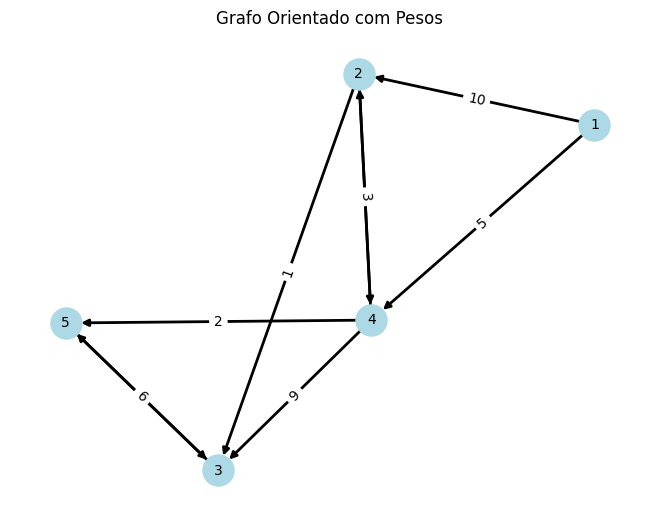

In [12]:
# Grafo orientado com pesos
G = nx.DiGraph()

# Adicionando nós
G.add_nodes_from([1, 2, 3, 4, 5])

# Adicionando arestas com pesos
G.add_weighted_edges_from([(1, 2, 10), (1, 4, 5), (2, 4, 2), (4, 2, 3),
                           (2, 3, 1), (4, 3, 9), (4, 5, 2), (3, 5, 4), (5, 3, 6)])

# Desenhando o grafo
pos = nx.spring_layout(G)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo Orientado com Pesos")
plt.show()